In [1]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof Tushar Sandhan, Department of Electrical Engineering, IIT Kanpur

In [2]:
import argparse
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import defaultdict
from google.colab.patches import cv2_imshow

Upload 'pic2.png' file manually to your google colab working directory:

1. Click on the folder drawing button on the left below the <> sign.
2. Click on Upload to session storage button to upload the image.

In [3]:
## In this function, after getting the edge image, circle detection will be carried out.

def find_hough_circles(image, edge_image, r_min, r_max, delta_r, num_thetas, bin_threshold, post_process = True):

  '''
  Input:

  image - Input 2-D RGB image

  edge_image - Canny algorithm output of image variable

  r_min - Min radius circle to detect. Default is 10.

  r_max - Max radius circle to detect. Default is 200.

  delta_r - Delta change in radius from r_min to r_max. Default is 1.

  num_thetas - Number of steps for theta from 0 to 2PI. Default is 100.

  bin_threshold - Thresholding value in percentage to shortlist candidate for circle. Default is 0.4 i.e. 40%.

  Output:

  output_image

  out_circles

  '''


  img_height, img_width = edge_image.shape[:2]
  
  # R and Theta ranges
  dtheta = int(360 / num_thetas)
  
  #######################################################################
   # Write code according to the instruction written infront of the line.
  #######################################################################

  thetas = np.arange(0, 360, step=dtheta)       ## Use np.arange; divide 0 to 360 in dtheta steps; name it thetas ## 
  rs = np.arange(r_min, r_max, step=delta_r)    ## Use np.arange; divide radius from r_min to r_max in delta_r steps; name it rs ##

  # Cos and Sin of theta values required later
  cos_thetas = np.cos(np.deg2rad(thetas))
  sin_thetas = np.sin(np.deg2rad(thetas))
  
  
  circle_candidates = []
  
  for r in rs:
    for t in range(num_thetas):
      circle_candidates.append((r, int(r * cos_thetas[t]), int(r * sin_thetas[t])))
   
  accumulator = defaultdict(int)
  

  #######################################################################
   # Write code according to the instruction written infront of the line.
  #######################################################################
  
  for i in range (img_height):                         ##  Using nested for loops, for every point (x,y) in edge_image, 
    for j in range (img_width):                         #  1. for every white pixel,
      if(edge_image[i,j] == 255):                       #  2. iterate through all three variables of circle_candidates namely r,rcos_t and rsin_t together 
        for k in range(len(circle_candidates)):                            #     and calculate x_center = x - rcos_t and y_center = y - rsin_t                                               #  3. and, increment the accumulator using accumulator[(x_center, y_center, r)] += 1
            r,rcos_t,rsin_t = circle_candidates[k]
            x_center = j - rcos_t
            y_center = i - rsin_t
            accumulator[(x_center, y_center, r)] += 1
                                   
  output_img = image.copy()
  
  out_circles = []
  
  #######################################################################
   # Write code according to the instruction written infront of the line.
  #######################################################################

  sorted_tuples = sorted(accumulator.items(), key=lambda item: item[1], reverse=True)           
  for i in range (len(sorted_tuples)):
    x,y=sorted_tuples[i]
    if(y >= num_thetas*bin_threshold):
      a,b,c = x
      out_circles.append((a,b,c,y/num_thetas))
      print((a,b,c,y/num_thetas))
    else:
      break       
  
  # This step further narrows down our candidates by eliminating very nearby circles 
  # and only keeps circles which are far from each other by a pixel_threshold
  if post_process :
    pixel_threshold = 5
    postprocess_circles = []
    for x, y, r, v in out_circles:
      if all(abs(x - xc) > pixel_threshold or abs(y - yc) > pixel_threshold or abs(r - rc) > pixel_threshold for xc, yc, rc, v in postprocess_circles):
        postprocess_circles.append((x, y, r, v))
    out_circles = postprocess_circles
  
  
  for x, y, r, v in out_circles:
    output_img = cv2.circle(output_img, (x,y), r, (123,15,125), 2)
  
  return output_img, out_circles


Click on Runtime and select Run all before submitting this file.

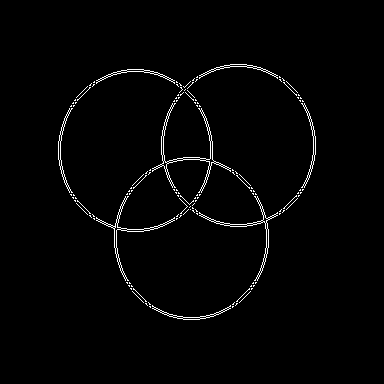

Detecting Hough Circles Started!
(139, 150, 80, 0.54)
(242, 145, 80, 0.53)
(195, 238, 80, 0.52)
(239, 145, 79, 0.45)
(191, 244, 76, 0.44)
(138, 149, 79, 0.43)
(135, 149, 78, 0.43)
(238, 149, 77, 0.43)
(192, 238, 79, 0.43)
(191, 239, 78, 0.43)
(191, 242, 77, 0.43)
(190, 241, 76, 0.43)
(241, 144, 79, 0.42)
(238, 144, 78, 0.42)
(135, 151, 78, 0.42)
(237, 148, 76, 0.42)
(194, 237, 79, 0.42)
(191, 237, 78, 0.42)
(240, 146, 80, 0.41)
(141, 150, 82, 0.41)
(137, 149, 80, 0.41)
(136, 150, 79, 0.41)
(138, 151, 79, 0.41)
(238, 151, 76, 0.41)
(238, 150, 74, 0.41)
(134, 153, 76, 0.41)
(194, 237, 81, 0.41)
(187, 238, 80, 0.41)
(192, 241, 76, 0.41)
(191, 243, 74, 0.41)
(244, 145, 82, 0.4)
(238, 142, 78, 0.4)
(240, 144, 80, 0.4)
(241, 146, 81, 0.4)
(138, 149, 81, 0.4)
(135, 147, 78, 0.4)
(138, 150, 80, 0.4)
(138, 151, 81, 0.4)
(137, 150, 79, 0.4)
(238, 146, 78, 0.4)
(239, 148, 76, 0.4)
(135, 154, 77, 0.4)
(134, 154, 76, 0.4)
(135, 156, 76, 0.4)
(136, 153, 76, 0.4)
(197, 238, 82, 0.4)
(193, 237, 80, 0.

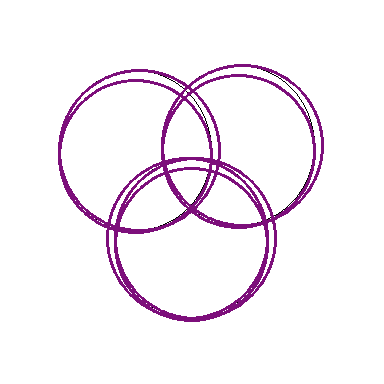

Detecting Hough Circles Complete!


In [4]:
###################################################################
## Try to vary these values and observe the change in output   ###
## The best values may or may not be the given values          ####
r_min = 70
r_max = 85
delta_r = 1
num_thetas = 100
bin_threshold = 0.4
min_edge_threshold = 100
max_edge_threshold = 200
###################################################################

input_img = cv2.imread('pic2.png')
edge_image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
edge_image = cv2.Canny(edge_image, min_edge_threshold, max_edge_threshold)
cv2_imshow(edge_image)
cv2.waitKey(0)

if edge_image is not None:
    
    print ("Detecting Hough Circles Started!")
    circle_img, circles = find_hough_circles(input_img, edge_image, r_min, r_max, delta_r, num_thetas, bin_threshold)
    cv2_imshow( circle_img)
    cv2.waitKey(0)
    
    
else:
    print ("Error in input image!")
        
print ("Detecting Hough Circles Complete!")
